In [1]:
import geopandas
import pygeos
import numpy
import pandas

In [2]:
sample = geopandas.read_parquet("../../data/sample.parquet")
sample

,eFUA_ID,UC_num,UC_IDs,eFUA_name,Commuting,Cntry_ISO,Cntry_name,FUA_area,UC_area,FUA_p_2015,UC_p_2015,Com_p_2015,geometry,continent,iso_a3
305,9129.0,1.0,8078,Gonda,1.0,IND,India,66.0,29.0,1.074100e+06,1.066419e+06,7.680678e+03,"POLYGON ((81.98398 27.19657, 81.99471 27.19657...",Asia,IND
91,7578.0,6.0,10577;10581;10583;10596;10605;10607,Chongqing,1.0,CHN,China,2267.0,618.0,6.036834e+06,5.157726e+06,8.791079e+05,"POLYGON ((106.23972 29.52328, 106.19622 29.523...",Asia,CHN
29,4316.0,7.0,9922;9930;9938;9943;9946;9949;9975,Comilla,1.0,BGD,Bangladesh,4493.0,2747.0,8.812244e+06,6.763698e+06,2.048546e+06,"POLYGON ((90.66045 23.51437, 90.61834 23.51437...",Asia,BGD
476,5572.0,3.0,6319;6321;6323,Abbottabad,1.0,PAK,Pakistan,401.0,148.0,1.712394e+06,1.553458e+06,1.589355e+05,"POLYGON ((73.26627 34.51876, 73.27753 34.51876...",Asia,PAK
115,8448.0,1.0,11199,Luohe,1.0,CHN,China,852.0,172.0,1.188290e+06,6.767104e+05,5.115800e+05,"POLYGON ((114.01543 33.70198, 114.10490 33.701...",Asia,CHN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,888.0,2.0,316;321,San Salvador,1.0,SLV,ElSalvador,2004.0,341.0,2.661756e+06,1.860187e+06,8.015684e+05,"POLYGON ((-89.14427 14.02114, -89.15444 14.021...",North America,SLV
623,6942.0,3.0,768;775;772,Raleigh,1.0,USA,UnitedStates,3950.0,307.0,1.611391e+06,4.410638e+05,1.170327e+06,"POLYGON ((-78.86717 36.17029, -78.82159 36.170...",North America,USA
73,3485.0,4.0,1013;1017;1026;1030,Montreal,1.0,CAN,Canada,5027.0,1201.0,4.089586e+06,3.345918e+06,7.436680e+05,"POLYGON ((-74.13546 45.46856, -74.14310 45.477...",North America,CAN
606,5961.0,1.0,411,Kansas City,1.0,USA,UnitedStates,7540.0,1026.0,1.966035e+06,1.129297e+06,8.367380e+05,"POLYGON ((-94.56996 39.61214, -94.55823 39.612...",North America,USA


In [3]:
all_poly = []
for i, row in sample.iterrows():
    fua = geopandas.read_parquet(f"../../data/{int(row.eFUA_ID)}/polygons/")
    fua['continent'] = row.continent
    fua['country'] = row.Cntry_name
    fua['name'] = row.eFUA_name
    fua.crs = None
    all_poly.append(fua)
all_poly_data = pandas.concat(all_poly).reset_index(drop=True)

In [4]:
fua = geopandas.read_parquet(f"../../data/{int(888.0)}/polygons/")

In [5]:
fua

,geometry,area,reock,shape_index,isoperimetric_quotient,isoareal_quotient,radii_ratio,diameter_ratio,boundary_amplitude,squareness,schumm_shape_index
__null_dask_index__,,,,,,,,,,,
0,"POLYGON ((261455.531 1514898.094, 261449.306 1...",14914.567680,0.345115,71.744265,0.446279,0.668041,0.585578,0.566898,0.899090,0.568220,0.585578
1,"POLYGON ((261449.306 1514833.727, 261455.531 1...",2144.745973,0.031747,8.251602,0.075772,0.275267,0.177604,0.042986,0.999704,0.096476,0.177604
2,"POLYGON ((261455.531 1514898.094, 261363.089 1...",11928.475678,0.578817,83.092765,0.759443,0.871460,0.758357,0.674924,1.000000,0.966952,0.758357
3,"POLYGON ((261449.306 1514833.727, 261446.243 1...",950.974318,0.174963,12.899029,0.237199,0.487030,0.416942,0.422414,0.875442,0.302011,0.416942
4,"POLYGON ((261363.089 1514930.657, 261358.138 1...",6753.525124,0.481746,57.039312,0.731688,0.855387,0.691850,0.580309,1.000000,0.931614,0.691850
...,...,...,...,...,...,...,...,...,...,...,...
11301,"POLYGON ((258356.323 1527656.014, 258361.579 1...",1804.915634,0.204458,19.210141,0.429986,0.655733,0.450718,0.172775,1.000000,0.547475,0.450718
11302,"POLYGON ((253830.239 1510384.830, 253849.043 1...",1468.731839,0.188434,16.636078,0.366937,0.605754,0.432696,0.186184,0.998633,0.467199,0.432696
11303,"POLYGON ((240868.318 1531251.283, 240932.559 1...",2512.315524,0.529072,36.458146,0.757496,0.870342,0.725037,0.732694,1.000000,0.964474,0.725037


<AxesSubplot: ylabel='Frequency'>

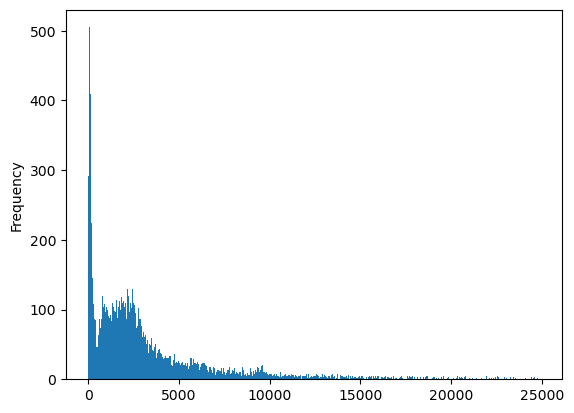

In [17]:
ix = (fua.reock * fua.area)
ix[ix<25000].plot.hist(bins=500)

<AxesSubplot: ylabel='Frequency'>

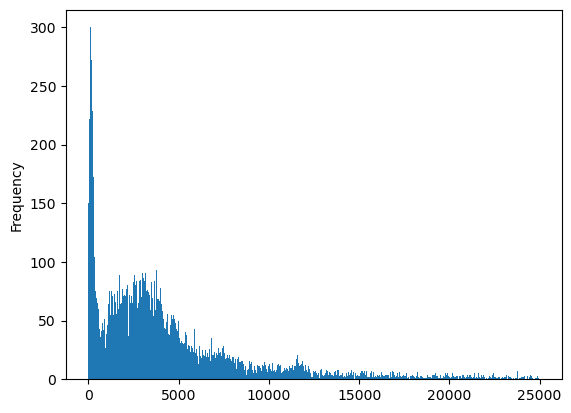

In [18]:
ix = (fua.isoperimetric_quotient * fua.area)
ix[ix<25000].plot.hist(bins=500)

<AxesSubplot: ylabel='Frequency'>

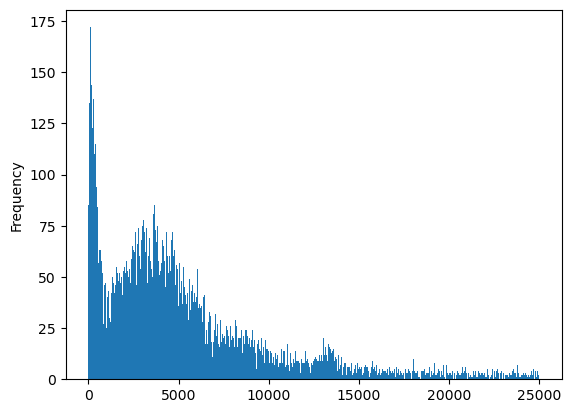

In [19]:
ix = (fua.isoareal_quotient * fua.area)
ix[ix<25000].plot.hist(bins=500)

<AxesSubplot: ylabel='Frequency'>

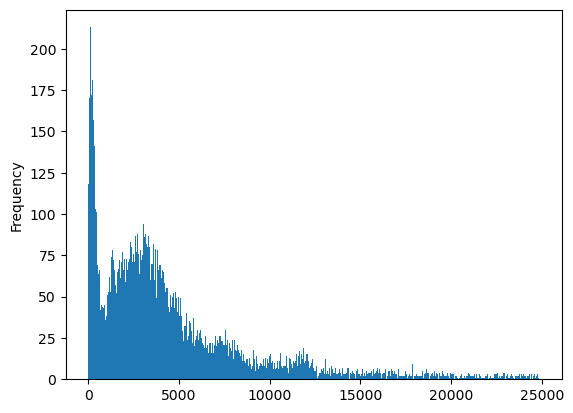

In [20]:
ix = (fua.radii_ratio * fua.area)
ix[ix<25000].plot.hist(bins=500)

<AxesSubplot: ylabel='Frequency'>

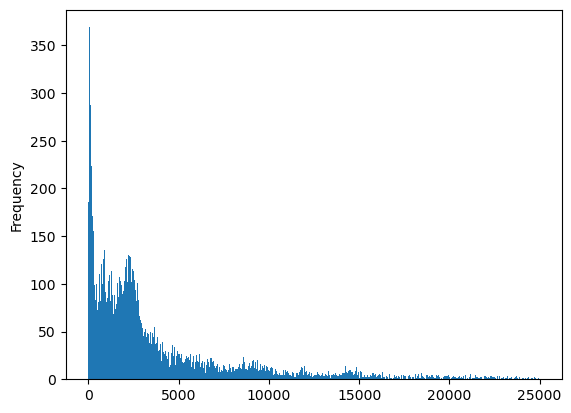

In [21]:
ix = (fua.diameter_ratio * fua.area)
ix[ix<25000].plot.hist(bins=500)

<AxesSubplot: ylabel='Frequency'>

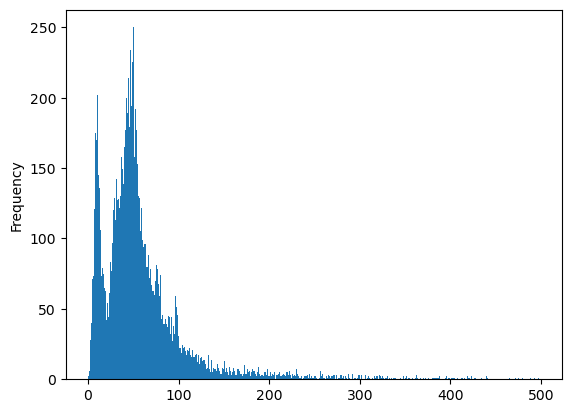

In [24]:
fua.shape_index[fua.shape_index<500].plot.hist(bins=500)

## Direct indices

In [54]:
ga = all_poly_data.geometry.array.data

%time d_reock = (pygeos.area(ga) ** 2) / pygeos.area(pygeos.minimum_bounding_circle(ga))
%time d_reock_used = pygeos.area(ga) / numpy.sqrt(pygeos.area(pygeos.minimum_bounding_circle(ga)))
%time d_isoperimetric = (4 * numpy.pi * (pygeos.area(ga) ** 2)) / pygeos.length(ga) ** 2
%time d_isoareal = (2 * numpy.sqrt(numpy.pi) * (pygeos.area(ga) ** (3/2))) / pygeos.length(ga)
%time d_radii = (pygeos.area(ga) ** (3/2)) / numpy.sqrt(numpy.pi) * pygeos.minimum_bounding_radius(ga)

CPU times: user 39 s, sys: 2.04 s, total: 41.1 s
Wall time: 42 s
CPU times: user 38.8 s, sys: 1.3 s, total: 40.1 s
Wall time: 40.4 s
CPU times: user 233 ms, sys: 250 ms, total: 483 ms
Wall time: 481 ms
CPU times: user 222 ms, sys: 7.49 ms, total: 230 ms
Wall time: 231 ms
CPU times: user 37.9 s, sys: 71.8 ms, total: 38 s
Wall time: 38 s


<AxesSubplot: ylabel='Frequency'>

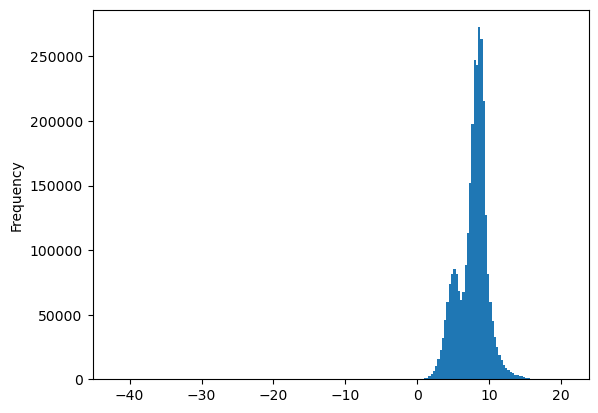

In [55]:
ix = pandas.Series(numpy.log(d_reock))
ix.plot.hist(bins=200)

<AxesSubplot: ylabel='Frequency'>

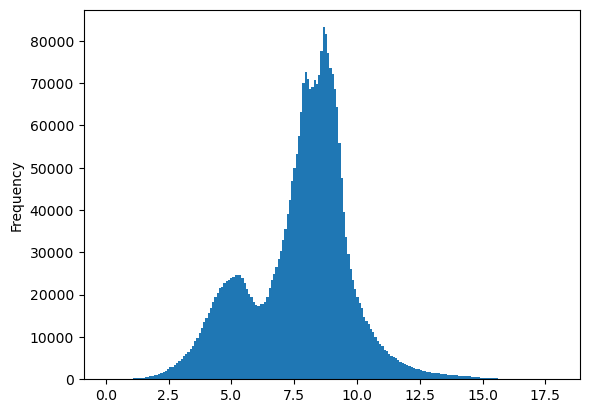

In [67]:
ix = pandas.Series(numpy.log(d_reock))

ix[(ix > 0) & (ix < 18)].plot.hist(bins=200)

<AxesSubplot: ylabel='Frequency'>

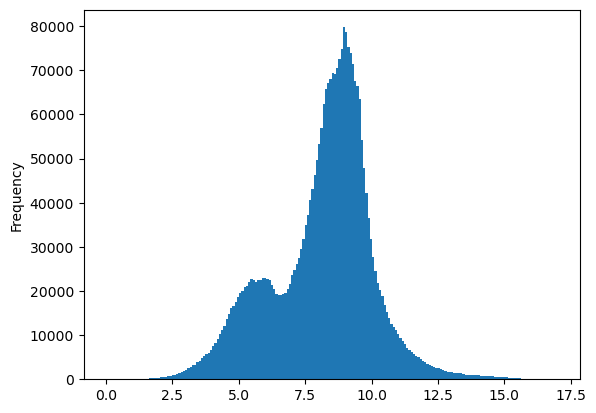

In [63]:
ix = pandas.Series(numpy.log(d_isoperimetric))

ix[(ix > 0) & (ix < 17)].plot.hist(bins=200)

<AxesSubplot: ylabel='Frequency'>

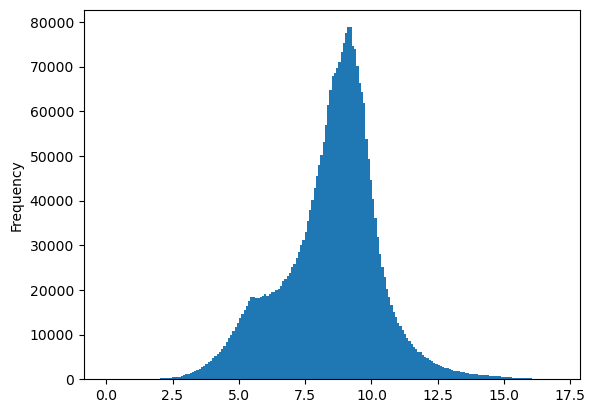

In [64]:
ix = pandas.Series(numpy.log(d_isoareal))

ix[(ix > 0) & (ix < 17)].plot.hist(bins=200)

<AxesSubplot: ylabel='Frequency'>

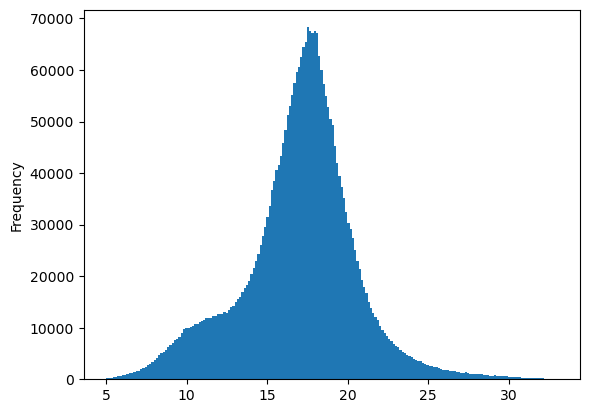

In [65]:
ix = pandas.Series(numpy.log(d_radii))

ix[(ix > 5) & (ix < 33)].plot.hist(bins=200)

<AxesSubplot: ylabel='Frequency'>

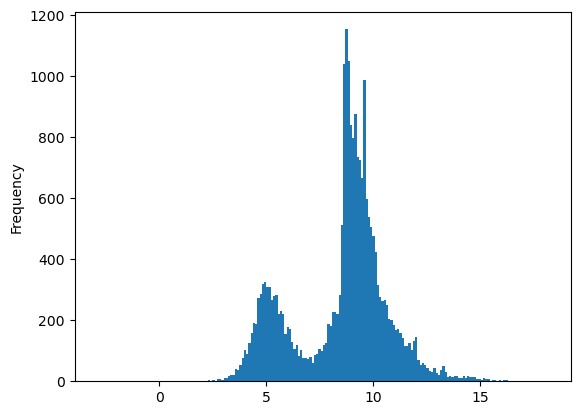

In [70]:
ix = numpy.log(fua.diameter_ratio * fua.area)
ix.plot.hist(bins=200)

<AxesSubplot: ylabel='Frequency'>

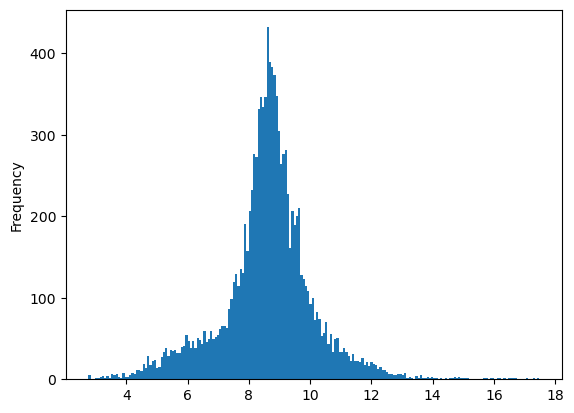

In [7]:
ix = numpy.log(fua.boundary_amplitude * fua.area)
ix.plot.hist(bins=200)

<AxesSubplot: ylabel='Frequency'>

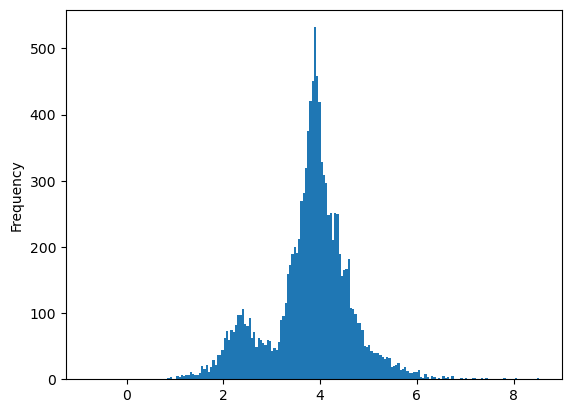

In [6]:
ix = numpy.log(fua.shape_index)
ix.plot.hist(bins=200)

/Users/martin/mambaforge/envs/stable/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1259: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


(-0.05, 20000.0)

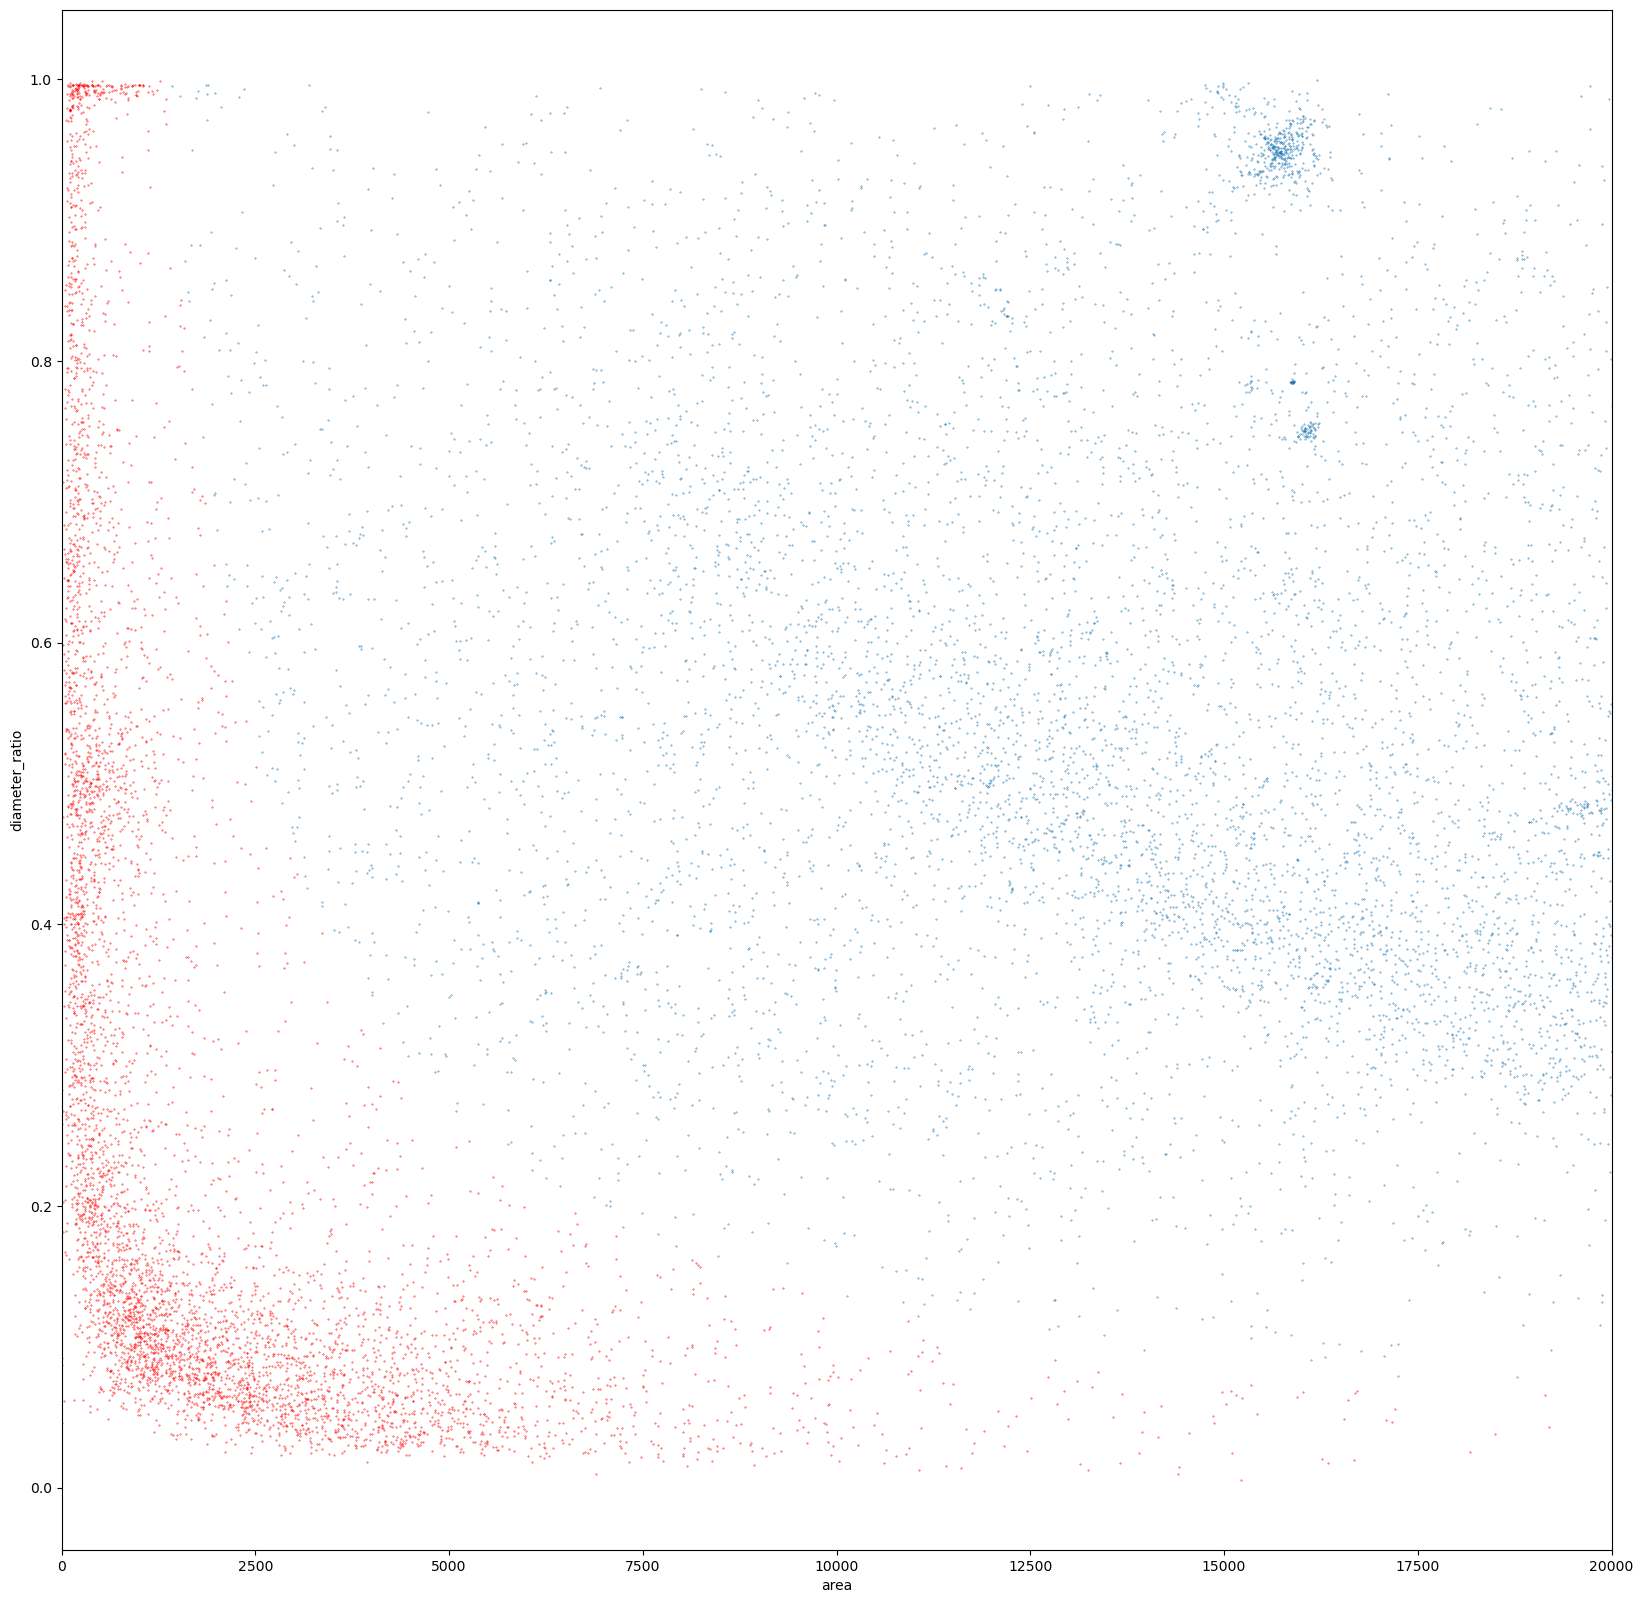

In [85]:
value = 7.2
ax = fua.drop(columns='geometry')[ix.values > value].plot.scatter("area", "diameter_ratio", figsize=(20, 20), cmap='tab20', s=.1)
fua.drop(columns='geometry')[ix.values < value].plot.scatter("area", "diameter_ratio", ax=ax, c='r', s=.1)
ax.set_xlim(-.05, 20000)

In [73]:
ix.shape

(23944,)